In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler

In [2]:
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
PREC = 6
title_prop = {"font":"serif","color":"blue","size":20}
label_prop = {"font":"serif","color":"darkred","size":15}

In [83]:
df = pd.read_csv("data/train_final.csv")

In [84]:
df.head()

,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,0,5722,35469,7,1,Enchilada Black Bean Vegetable,38,1,frozen meals,frozen,19102,prior,45,5,10,7.0
1,1,5722,45613,10,1,Pad Thai,38,1,frozen meals,frozen,19102,prior,45,5,10,7.0
2,2,5722,41842,4,1,Organic Gluten Free Chia Plus with Quinoa & Am...,52,1,frozen breakfast,frozen,19102,prior,45,5,10,7.0
3,3,5722,19448,12,1,Organic Gluten Free & Wheat Free Pumpkin Spice...,52,1,frozen breakfast,frozen,19102,prior,45,5,10,7.0
4,4,5722,24195,1,1,Tofu Scramble,52,1,frozen breakfast,frozen,19102,prior,45,5,10,7.0


In [85]:
len(df)

199662

In [86]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [87]:
df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,5722,35469,7,1,Enchilada Black Bean Vegetable,38,1,frozen meals,frozen,19102,prior,45,5,10,7.0
1,5722,45613,10,1,Pad Thai,38,1,frozen meals,frozen,19102,prior,45,5,10,7.0
2,5722,41842,4,1,Organic Gluten Free Chia Plus with Quinoa & Am...,52,1,frozen breakfast,frozen,19102,prior,45,5,10,7.0
3,5722,19448,12,1,Organic Gluten Free & Wheat Free Pumpkin Spice...,52,1,frozen breakfast,frozen,19102,prior,45,5,10,7.0
4,5722,24195,1,1,Tofu Scramble,52,1,frozen breakfast,frozen,19102,prior,45,5,10,7.0


In [88]:
df.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'aisle', 'department',
       'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')

In [10]:
temp_df = pd.read_csv("data/random_forest_data.csv")

In [11]:
temp_df.head()

,Unnamed: 0,department_id,aisle,aisle_id
0,0,-0.998356,0.367240,-0.716729
1,1,-0.998356,0.367240,-0.716729
2,2,-0.998356,-0.220594,-0.332216
3,3,-0.998356,-0.220594,-0.332216
4,4,-0.998356,-0.220594,-0.332216


In [13]:
df["aisle_id"].unique()

array([ 38,  52,  58,  37, 129,  79,  34,  42, 116, 119, 113,  24, 123,
        32,  83,  16])

In [14]:
df.head()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,aisle,department,order_dow,order_hour_of_day,days_since_prior_order
0,5722,35469,7,1,38,1,frozen meals,frozen,5,10,7.0
1,5722,45613,10,1,38,1,frozen meals,frozen,5,10,7.0
2,5722,41842,4,1,52,1,frozen breakfast,frozen,5,10,7.0
3,5722,19448,12,1,52,1,frozen breakfast,frozen,5,10,7.0
4,5722,24195,1,1,52,1,frozen breakfast,frozen,5,10,7.0


In [18]:
#EDA

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [20]:
#Univariate Analysis

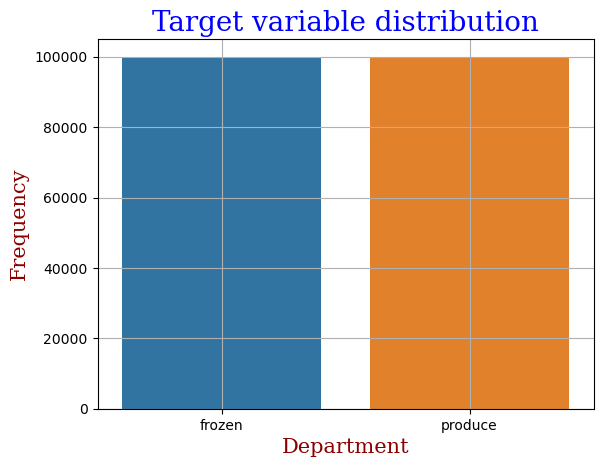

In [74]:
#target variable distribution
sns.countplot(data=df,x="department")
plt.xlabel("Department",fontdict=label_prop)
plt.ylabel("Frequency",fontdict=label_prop)
plt.title("Target variable distribution",fontdict=title_prop)
plt.grid()
plt.show()

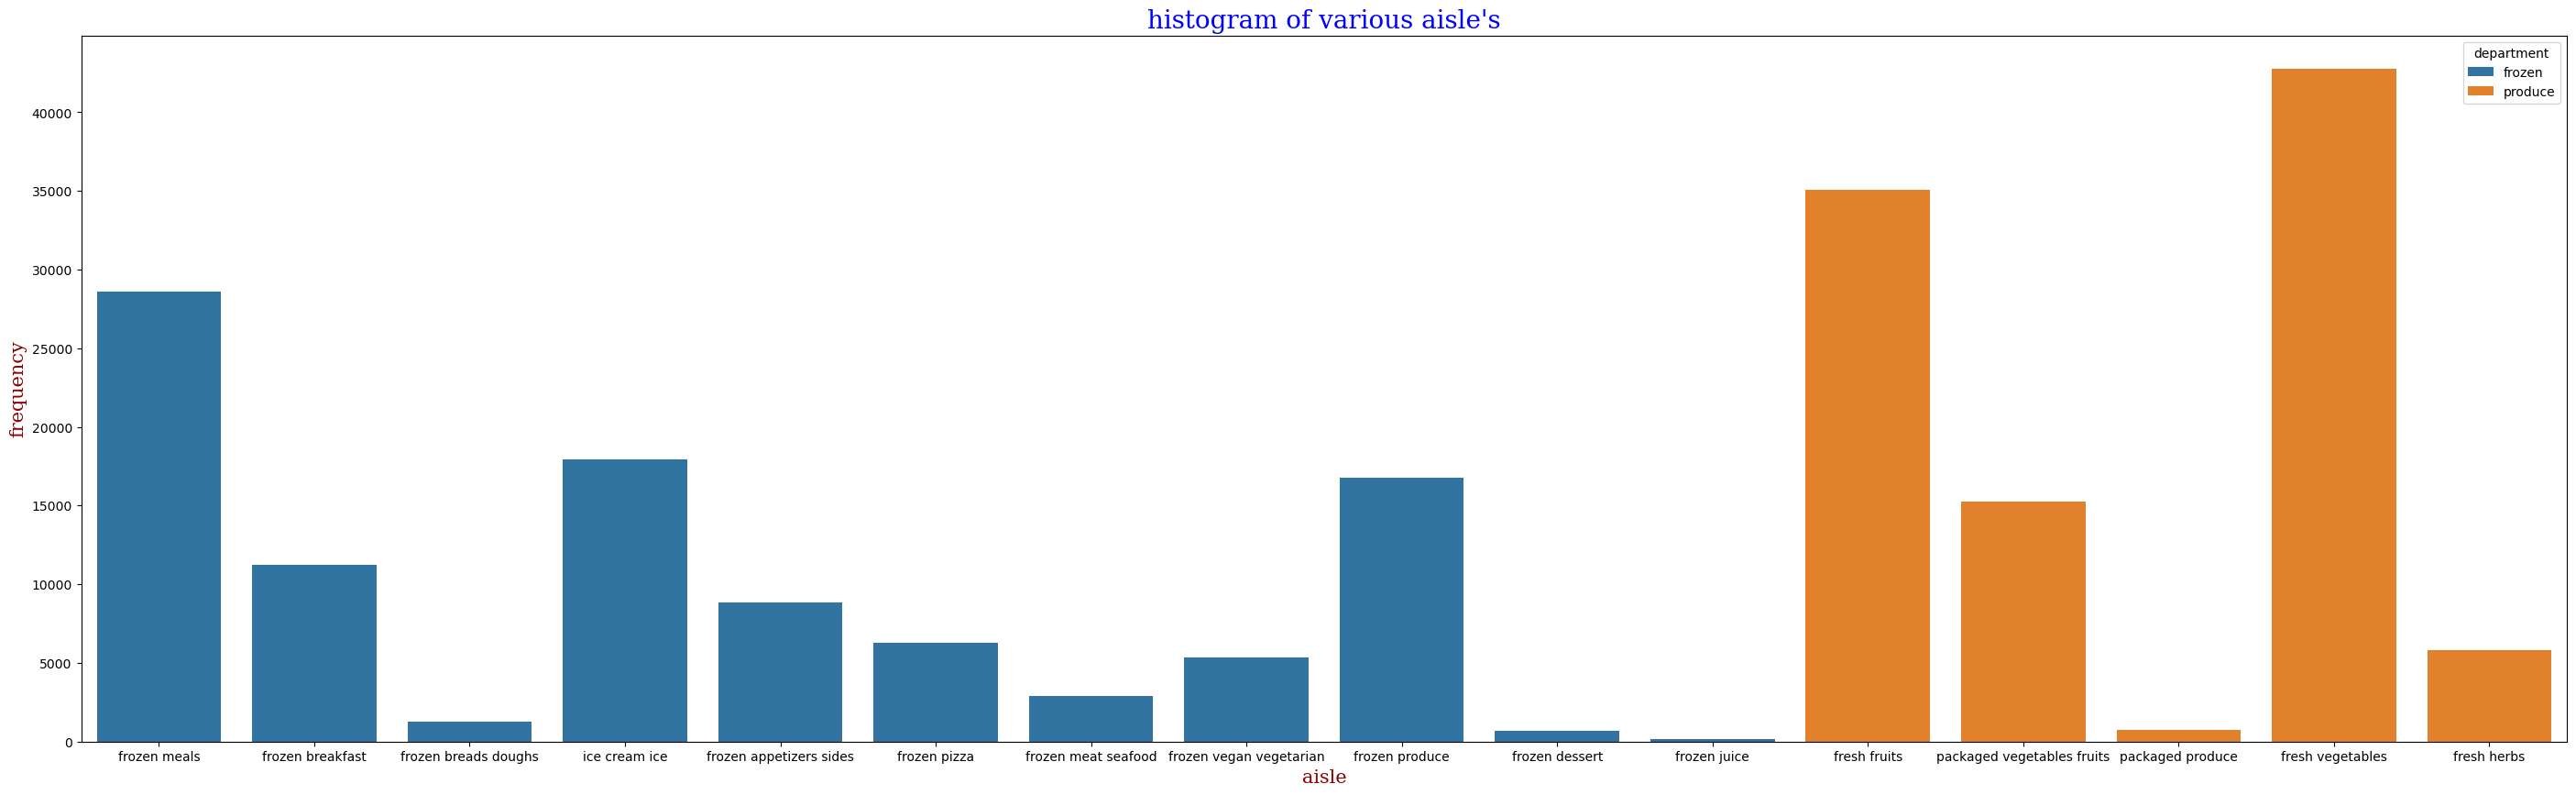

In [77]:
#number of aisles in the dataset
plt.figure(figsize=(35,10))
sns.countplot(df,x="aisle",width=0.8,hue="department",dodge=False)
plt.title("histogram of various aisle's",fontdict=title_prop)
plt.xlabel("aisle",fontdict=label_prop)
plt.ylabel("frequency",fontdict=label_prop)
plt.show()

In [78]:
#number of orders by the user

In [82]:
df

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,aisle,department,order_dow,order_hour_of_day,days_since_prior_order
0,5722,35469,7,1,38,1,frozen meals,frozen,5,10,7.0
1,5722,45613,10,1,38,1,frozen meals,frozen,5,10,7.0
2,5722,41842,4,1,52,1,frozen breakfast,frozen,5,10,7.0
3,5722,19448,12,1,52,1,frozen breakfast,frozen,5,10,7.0
4,5722,24195,1,1,52,1,frozen breakfast,frozen,5,10,7.0
...,...,...,...,...,...,...,...,...,...,...,...
199657,3332063,29487,8,1,83,4,fresh vegetables,produce,0,9,5.0
199658,3332063,26209,3,1,24,4,fresh fruits,produce,0,9,5.0
199659,3332063,44142,7,1,83,4,fresh vegetables,produce,0,9,5.0
199660,3332063,41259,5,1,83,4,fresh vegetables,produce,0,9,5.0


In [133]:
temp_ = df.groupby(["user_id"])["order_id"].agg(lambda x:len(x.unique())).reset_index(name="order_count").set_index("user_id")

,order_count
user_id,
100198,55
1004,54
100574,70
100787,100
100982,99
...,...
98971,51
99013,40
9950,60


In [125]:
temp_.sort_values(by="order_count")

,user_id,order_count
385,123900,11
290,94109,11
570,179588,12
75,25091,13
488,154657,14
...,...,...
473,150840,100
323,103593,100
551,174046,100
395,127158,100


In [150]:
temp_["order_count"].value_counts().sort_values(ascending=False)

order_count
43    18
48    17
99    17
47    16
66    15
      ..
16     1
13     1
79     1
17     1
91     1
Name: count, Length: 90, dtype: int64

In [165]:
temp_["order_count"].sum()

37808

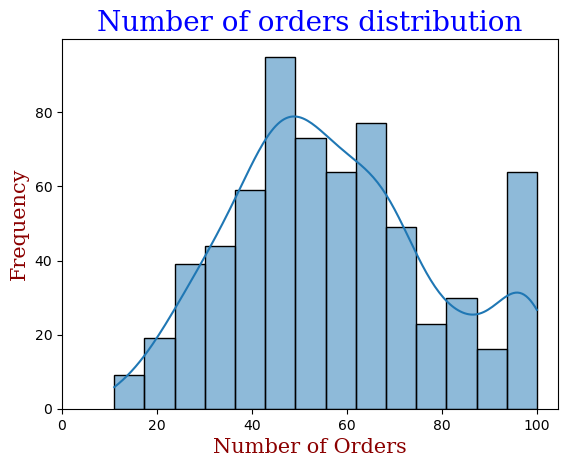

In [163]:
sns.histplot(data=temp_,x="order_count",kde=True) #kde_kws not working properly
plt.xticks(list(range(0,120,20)))
plt.xlabel("Number of Orders",fontdict=label_prop)
plt.ylabel("Frequency",fontdict=label_prop)
plt.title("Number of orders distribution",fontdict=title_prop)

plt.show()

Most people in the dataset ordered between 40 and 80 items in our dataset